# Computational Science

## Imports 

In [1]:
import pandas as pd #Import Pandas for Dataframes
import seaborn as sns #Import Seaborn for Graphs
import numpy as np #Import numpy for arrays
import math # Import Math for Sqrt,cos and Sin
import random # Import Random for Random Number Generation

# Part 1: Simulating the Robot in 2D Space

## Eulers Algorithm

![Eulers](https://i.imgur.com/MPAQeOI.jpg)

Eulers Algorithm is Used to calulate where the robot is in 2D Space given a set of co-ordinates, a max time and a step size. It calulates the position of x by performing F = -2x+2U Where U is the current step and x is the position. it does this for each step untill the max time is hit. This can then be plotted to give a location and path of the robot in 2D space. By solving the differential equations the robot can be tracked in the space. 

In [2]:
def EulersEquation(U,x): # Eulers Equation  F = -2X+2U used to calulate the value of x in the full algorithm 
    f = -2*x +2*U #Performs the equation 
    return f # Returns the value

def IntergationCount (h,i): # Integration Count is used to calulate the difference between the Step size and the sample integral
    OGStep = h # Sets the Original Step size to the value of the step size (this changes later so needs to be constant)
    Count  = 0 # Set count varible to 0, This will be the difference
    S = False # set Start to False 
    if (i == 0):  # if the Sample Integral is not set set S to True
        S = True

    while S == False: # If the sample integral is set calculate the difference
        Count = Count + 1
        if (Count*OGStep == i): #verify if integral size is the correct amount then shut the gate
            S = True
            
    return Count #return the sample size

def Eulers(a,b,h,T,i): #Take in XInit,YInit, Step Size, Time and Sample Intergal
    df1 = pd.DataFrame({"T":[],"X":[],"U":[]}) #declare dataframe structure 
    t =a #Set Time at position 0, Can be higher based on inital Entry
    x= b  # Set x at position 0, Can be higher based on inital Entry
    Count = 0 #set count to 0 used in determing how many to print based on the sample size
    
    IntegrationCount = IntergationCount(h,i) #Calculate the sample size 
    
    while t<=T: #while Current time < initial time
        if (t<0 or t<=5): #Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = h*EulersEquation(U,x) #perform equation stated in the method Eulers Eqation
        x = x +k # add predition to the x value (Plotted later)
        t = t+h #increase step for next result
        Count = Count + 1 # increase count for integral
        
        if (Count >= IntegrationCount): # if the count is at the integral amount add to dataframe
            df2 = pd.DataFrame({"T":[t],"X":[x],"U":[U]}) #get result of eulers in dataframe based on integral steps
            df1 = df1.append(df2) #append to dataframe
            Count = 0 #reset the count to 0
            
    df1.reset_index(inplace=True) # reset the index broken by appending 2 dataframes
    df1 = df1.drop(columns=['index']) #drop the inital index column (Blank)
    return df1 # return dataframe 

## Perform Eulers 

(Returns as Pandas Dataframe)

In [3]:
print ("Enter xInitial") # Ask the user to input Initial X Value
xInit = float (input())
print ("Enter yInitial") # Ask the user to input Initial Y Value
yInit = float (input())
print ("Enter Step Size") # Ask the user to input Step Size
Step = float (input())
print ("Enter Time") # Ask the user to input Time Value
Time = float (input()) 
print ("Enter Sample Integral (To Print all put 0 )") # Ask the user to input Sample Value
Integration = float (input())


df1 = Eulers(xInit,yInit,Step,Time,Integration) # Perform the Eulers method on those parameters and return a pandas dataframe
df1

Enter xInitial
0
Enter yInitial
0
Enter Step Size
0.01
Enter Time
15
Enter Sample Integral (To Print all put 0 )
0


,T,X,U
0,0.01,0.040000,2.0
1,0.02,0.079200,2.0
2,0.03,0.117616,2.0
3,0.04,0.155264,2.0
4,0.05,0.192158,2.0
...,...,...,...
1496,14.97,2.999911,3.0
1497,14.98,2.999913,3.0
1498,14.99,2.999915,3.0
1499,15.00,2.999916,3.0


### Export to CSV (if required)

In [4]:
print ("Please Enter Filepath to save to CSV") # Asks for filepath where user wants to save CSV File
filepath = input()
#export_csv = df1.to_csv (filepath + "\ComputationalRobot.csv") #Saves CSV based on input

Please Enter Filepath to save to CSV
0


## Plot graphs

Upper and lower limits for x is 3 and 0, which is in alignment with the upper limit for U (Robot) this means they fit in the same scale and follow a similar path to each other. This can be demonstated by the follwoing graphs

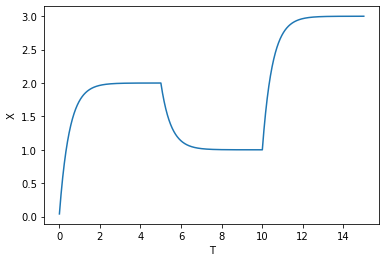

In [5]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots graph of the effects of X over time

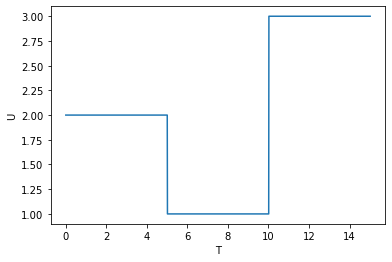

In [6]:
plt2 = sns.lineplot(x="T", y="U", data=df1) # Plots graph on the effect of U Over Time

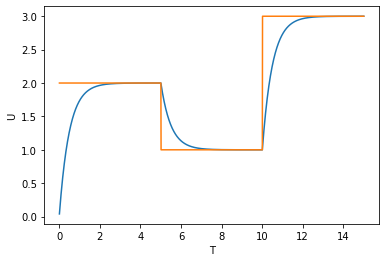

In [7]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots Comparision Graph 
plt2 = sns.lineplot(x="T", y="U", data=df1)
plt1
plt2

## Multiplot for Report 

In [8]:
df2 = Eulers(0,0,1,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df3 = Eulers(0,0,0.75,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df4 = Eulers(0,0,0.5,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df5 = Eulers(0,0,0.25,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df6 = Eulers(0,0,0.01,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df7 = Eulers(0,0,0.001,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe

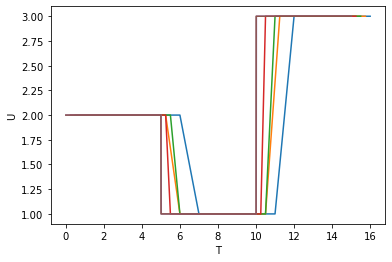

In [9]:
plt3 = sns.lineplot(x="T", y="U", data=df2) #blue
plt4 = sns.lineplot(x="T", y="U", data=df3) #Orange
plt5 = sns.lineplot(x="T", y="U", data=df4) #Green
plt6 = sns.lineplot(x="T", y="U", data=df5) #Red
plt7 = sns.lineplot(x="T", y="U", data=df6) #Purple
plt8 = sns.lineplot(x="T", y="U", data=df7) #Brown

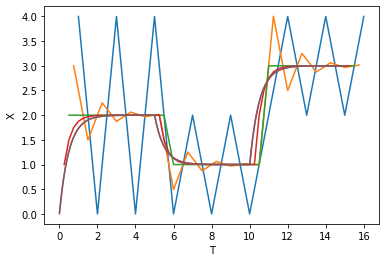

In [10]:
plt9 = sns.lineplot(x="T", y="X", data=df2) #Blue
plt10 = sns.lineplot(x="T", y="X", data=df3) #Orange
plt11 = sns.lineplot(x="T", y="X", data=df4) #Green
plt12 = sns.lineplot(x="T", y="X", data=df5) #Red
plt13 = sns.lineplot(x="T", y="X", data=df6) #Purple
plt14 = sns.lineplot(x="T", y="X", data=df7) #Brown

# Part 2: Adding Noise to Simulation

In order for a fair simulation a level of uncertainty should be added to the data to make predictions more accurate. If the model knows all the correct data then it could predict the exact result which is find but in the real world somethings can change beyond the control and without noise these changes won't be reflected in the simulation. 

below is the code to generate random numbers within a standard deviation of 0.01 and mean of 0 to give a normal distribution of random numbers. The Box Muller algorithm was used to generate these numbers.

## Box Muller Algorithm

In [11]:
standarddev = 0.001 #Target Standard Deviation
meanx = 0 # Target Mean
noise = [] #Noise array
distz1 = [] # Array of distribution of random numbers without modification
distb = [] #Slight modification of random numbers
distz2 = [] #First Set of Random Numbers
distz3 = [] #Second Set of Random Numbers

for ind in df1.index: # For each record in the dataframe
        z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
        distz1.append(z1) # append random numbers to z1 array
        
        #generate a random number between 0 and 1 uniformally generated
        b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
        distb.append(b) # append unformly generated numbers to array
        
        # calulate the sin of the first random number using the uniform number
        z2 = b*math.sin(z1)+meanx 
        distz2 = [z2] #add random number 1 to array
        
        # calulate the cos of the Second random number using the uniform number
        z3 = b*math.cos(z1)+meanx
        distz3 = [z3] #add random number 2 to array
        
        Xnoise = z2 
        Xnoise2 = z3 

        noise.append(Xnoise)# Add random number 1 to Xnoise
        noise.append(Xnoise2)# Add random number 2 to Xnoise

## Distribution Plots of Random Numbers 

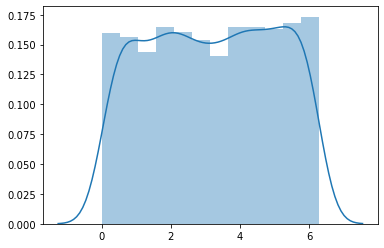

In [12]:
sns.distplot(distz1) #Distribution of random numbers before box muller

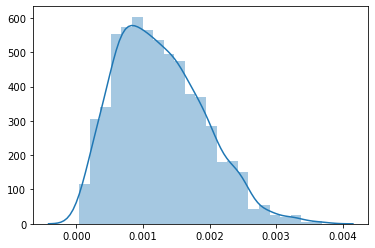

In [13]:
sns.distplot(distb) #Distribution of Random Uniform Numbers between 0 and 1

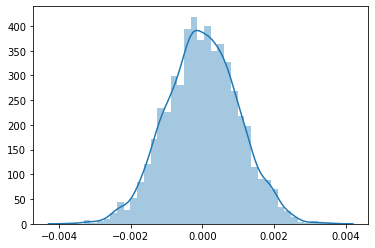

In [14]:
sns.distplot(noise) #Distribution of Standardised Numbers

## Add Noise to Dataframe

In [15]:
dfnoise = pd.DataFrame(noise) #Add noise to dataframe
dfnoise.columns =['Noise'] #Rename Col to Noise
dfnoise # Display Noise

,Noise
0,0.000164
1,-0.000130
2,-0.002642
3,0.000798
4,-0.000815
...,...
2997,-0.000393
2998,-0.001543
2999,0.001100
3000,-0.000631


In [16]:
dfcount = df1['X'].count() # Find count of x (how many in dataframe)

# add to dataframe the number of records in dataframe
dfnoiseshortened = dfnoise[dfnoise["Noise"].index < dfcount] 

df1['Noise'] = dfnoiseshortened # append noise to original dataframe
df1 #show dataframe

,T,X,U,Noise
0,0.01,0.040000,2.0,0.000164
1,0.02,0.079200,2.0,-0.000130
2,0.03,0.117616,2.0,-0.002642
3,0.04,0.155264,2.0,0.000798
4,0.05,0.192158,2.0,-0.000815
...,...,...,...,...
1496,14.97,2.999911,3.0,0.000364
1497,14.98,2.999913,3.0,-0.000844
1498,14.99,2.999915,3.0,-0.000902
1499,15.00,2.999916,3.0,0.001098


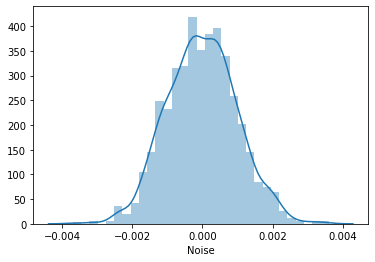

In [17]:
sns.distplot(df1['Noise']) #check if shortened noise still has a normal distrbution

In [18]:
XcombinedNoise =  df1['Noise'] + df1['X'] # Add Noise to the X value
df1['xNoise'] = XcombinedNoise # Add XNoise to dataframe
df1 #Display Dataframe

,T,X,U,Noise,xNoise
0,0.01,0.040000,2.0,0.000164,0.040164
1,0.02,0.079200,2.0,-0.000130,0.079070
2,0.03,0.117616,2.0,-0.002642,0.114974
3,0.04,0.155264,2.0,0.000798,0.156061
4,0.05,0.192158,2.0,-0.000815,0.191343
...,...,...,...,...,...
1496,14.97,2.999911,3.0,0.000364,3.000275
1497,14.98,2.999913,3.0,-0.000844,2.999069
1498,14.99,2.999915,3.0,-0.000902,2.999013
1499,15.00,2.999916,3.0,0.001098,3.001014


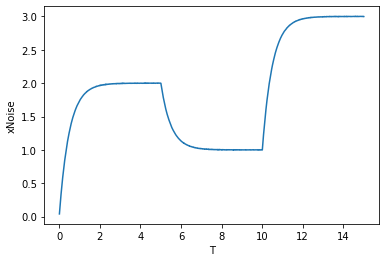

In [19]:
#Plot Effect Noise had on X (Increasing std to 0.1 makes the effect more evident)
Noiseplt = sns.lineplot(x="T", y="xNoise", data=df1) 

# Part 3: Predicting the Robot